In [5]:
import autograd.numpy as np


# =============================================
#
# load cifar-10-small and project down
#
 
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
labels =  np.squeeze(labels.T)
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
features = np.matrix(features)

# Make my own one-hot matrix
onehotlabels = np.matrix(np.zeros([10,N]))
onehotlabels[labels,np.arange(0,N)]=1
onehotlabels = np.squeeze(np.array(onehotlabels))


In [15]:
# This returns the gradient of a scalar function of a matrix
def numerical_gradient(function, x):
    
    [rows,cols] = x.shape
    dx = .0000001
    dfdx = np.matrix(np.zeros([rows,cols]))
    x_plus = np.matrix(np.zeros([rows,cols]))
    x_minus = np.matrix(np.zeros([rows,cols]))
    
    for i in xrange(0,rows):
        for j in xrange(0,cols):
            x_plus = np.copy(x)
            x_minus = np.copy(x)
            x_plus[i,j] = x_plus[i,j] + dx
            x_minus[i,j] = x_minus[i,j] - dx
            dfdx[i,j] = (function(x_plus)-function(x_minus))/(2.0*dx)
            
    return dfdx

In [34]:
def loss_function(W):
    
    #scores = W*features.T
    scores = W.dot(features.T)
    
    neg_log_likelihood = np.array(-np.log(np.exp(scores)/np.sum(np.exp(scores),axis=0)))
    loss = np.mean(np.array(onehotlabels)*np.array(neg_log_likelihood))
    
    return loss


In [44]:
def array_loss_function(W):
    #scores = W*features.T
    scores = np.dot(W,np.array(features.T))
    
    neg_log_likelihood = np.array(-np.log(np.exp(scores)/np.sum(np.exp(scores),axis=0)))
    loss = np.mean(np.array(onehotlabels)*np.array(neg_log_likelihood))
    
    return loss

In [22]:
def get_classification_accuracy(W):
    scores = W*features.T
    np.dot(W,np.array(features.T))
    classifications = np.squeeze(np.array(np.argmax(scores,axis=0)))
    correct_classifications = 0
    
    for i in xrange(0,len(labels)):
        if(labels[i]==classifications[i]):
            correct_classifications = correct_classifications + 1
    
    return 100.0*correct_classifications/(float(len(labels)))
    
    

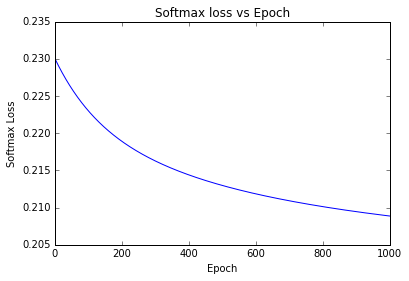

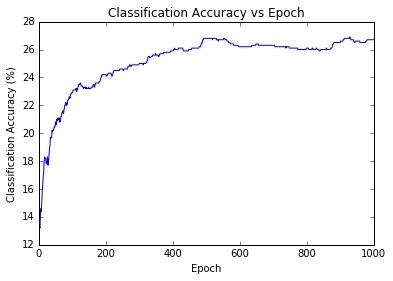

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

W = np.matrix(.01*np.random.randn(10,10))
step_size = .1
NUM_EPOCHS = 1000
losses = []
accuracies = []

for epoch in xrange(0,NUM_EPOCHS):
    grad = numerical_gradient( loss_function, W )
    W = W - step_size * grad
    losses.append(loss_function(W))
    accuracies.append(get_classification_accuracy(W))
      
t = np.linspace(0,NUM_EPOCHS,NUM_EPOCHS)

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(t,losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Softmax Loss')
ax.set_title('Softmax loss vs Epoch')
plt.show()

fig = plt.figure(2)
ax = fig.add_subplot(111)
plt.plot(t,accuracies)
ax.set_xlabel('Epoch')
ax.set_ylabel('Classification Accuracy (%)')
ax.set_title('Classification Accuracy vs Epoch')
plt.show()


In [49]:
from autograd import grad
import autograd.numpy as np



# =============================================
#
# load cifar-10-small
#
 
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
labels =  np.squeeze(labels.T)



W = np.array(.01*np.random.randn(10,3072))
step_size = .1
NUM_EPOCHS = 1000
losses = []
accuracies = []

grad_f = grad(array_loss_function)

for epoch in xrange(0,NUM_EPOCHS):
    
    losses.append(array_loss_function(W))
    accuracies.append(get_classification_accuracy(W))
    
    mygrad = grad_f(np.array(W))
    W = W - step_size * mygrad

      
t = np.linspace(0,NUM_EPOCHS,NUM_EPOCHS)

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(t,losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Softmax Loss')
ax.set_title('Softmax loss vs Epoch')
plt.show()

fig = plt.figure(2)
ax = fig.add_subplot(111)
plt.plot(t,accuracies)
ax.set_xlabel('Epoch')
ax.set_ylabel('Classification Accuracy (%)')
ax.set_title('Classification Accuracy vs Epoch')
plt.show()

ValueError: operands could not be broadcast together with shapes (10,3072) (3072,1000) 